In [121]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
from forestplot import forestplot

# Read CSV file into a DataFrame
t_dat = pd.read_csv("../3_output/coefs_fm.csv")


In [122]:
#SANBS

# Wide to long transformation
t_dat = pd.melt(t_dat, id_vars=['covariate'], var_name='concat')

# Split the 'concat' column into 'Measure' and 'Time Period'
#t_dat[['Measure', 'Time_Period']] = t_dat['concat'].str.split('_', expand=True)
t_dat[['Measure', 'Time_Period', 'Fixed_Mobile']] = t_dat['concat'].str.split('_', expand=True)

# Map 'Time Period' values to desired labels
time_period_mapping = {
    #'main': '2017-2022',
    'pre': 'Pre-COVID19',
    'intra': 'Intra-COVID19'
}

f_m__mapping = {
    #'main': '2017-2022',
    'f': 'Fixed',
    'm': 'Mobile'
}

t_dat['Time_Period'] = t_dat['Time_Period'].map(time_period_mapping)
t_dat['Fixed_Mobile'] = t_dat['Fixed_Mobile'].map(f_m__mapping)

# Pivot the DataFrame
t_dat = t_dat.pivot_table(index=['covariate', 'Time_Period', 'Fixed_Mobile'], columns='Measure', values='value')

# Calculate 'significant' column
t_dat['significant'] = ((t_dat['exp(coef)lower'] > 1) | (t_dat['exp(coef)upper'] < 1))
t_dat.reset_index(inplace=True)
t_dat=t_dat.loc[t_dat['exp(coef)'] != 1]

m=t_dat.query('Fixed_Mobile == "Fixed"')
f=t_dat.query('Fixed_Mobile == "Mobile"')


In [ ]:
  # Calculate dodge positions
    dodge_positions = []
    for i, covariate in enumerate(y_order):
        dodge_positions.append(i - dodge_width / 2)
        dodge_positions.append(i + dodge_width / 2)

     # Add horizontal bars to represent confidence intervals
    for index, row in df.iterrows():
        y = row['covariate']
        lower_ci = row['exp(coef)lower']
        upper_ci = row['exp(coef)upper']
        color = time_period_colors[row['Time_Period']]
        dodge_position = dodge_positions[y_order.index(y)]
        ax.hlines(y=dodge_position, xmin=lower_ci, xmax=upper_ci, color=color, linestyle='-', linewidth=2)
        
        
            # Create a dictionary to map Time Period to colors
    time_period_colors = {'Intra-COVID19':'blue', 'Pre-COVID19': 'orange'}
    dodge_width = 0.1
    
    for i, row in df.iterrows():
        x_offset = 0.1  # Adjust this value for positioning the line segments
        x_values = [row['exp(coef)'] - x_offset, row['exp(coef)'] + x_offset]
    
        for x in x_values:
            lower_ci = row['exp(coef)lower']
            upper_ci = row['exp(coef)upper']
            ax.plot([lower_ci, upper_ci], [x, x], color=time_period_colors[row['Time_Period']], linewidth=1)


In [210]:
# Function to create scatter plot with confidence intervals
def create_scatter_plot(ax, df, dataset_name, y_order):
        # Create the scatter plot
    scatter = sns.swarmplot(
        data=df,
        x='exp(coef)',
        y='covariate',
        hue='Time_Period',
        dodge=True,
        ax=ax
    )
    time_period_colors = {'Intra-COVID19':'blue', 'Pre-COVID19': 'orange'}
    
  
    for index, row in df.iterrows():
        y = row['covariate']
        coef=row['exp(coef)']
        lower_ci = row['exp(coef)lower']
        upper_ci = row['exp(coef)upper']
        color = time_period_colors[row['Time_Period']]
        ax.errorbar(coef, y, xerr=[coef - lower_ci, upper_ci - coef], color=color, linewidth=1)
   
    ax.axvline(x=1, linestyle="-", color="black")
    ax.set_xlabel("Hazard Ratio")
    ax.set_ylabel("")
    ax.set_xlim(0, 3.5)
    ax.legend(loc="lower right")
    ax.set_title(f"{dataset_name}")

   

ValueError: 'xerr' (shape: (2,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'x' (shape: (1,))

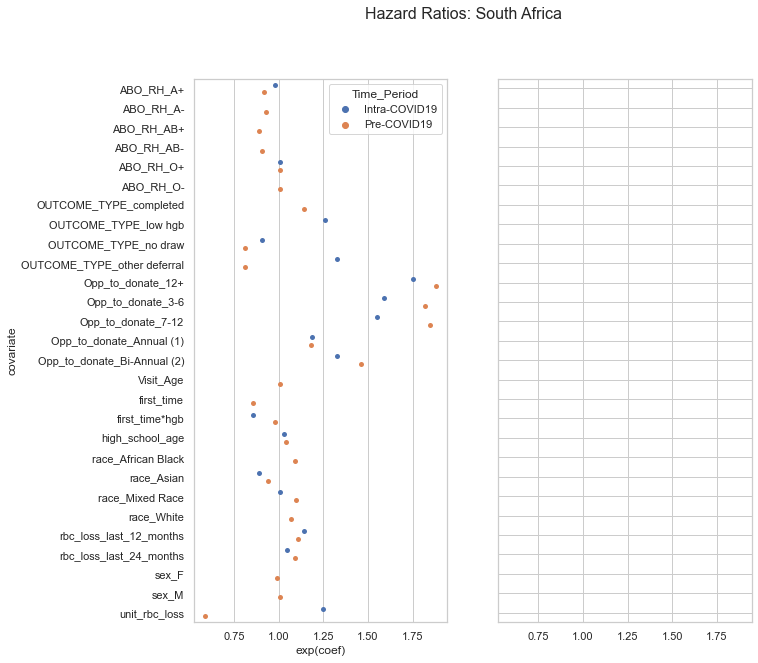

In [211]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 10), sharex=True, sharey=True)
ax1, ax2 = axes.flatten()
fig.suptitle('Hazard Ratios: South Africa', fontsize=16)
         

# Sort the DataFrame of the first dataset by 'coef' column
main.sort_values('exp(coef)', ascending=False, inplace=True)
y_order = main['covariate'].tolist()


create_scatter_plot(ax1, f, "Fixed", y_order)
create_scatter_plot(ax2, m, "Mobile", y_order)



# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

TypeError: unsupported operand type(s) for -: 'list' and 'list'

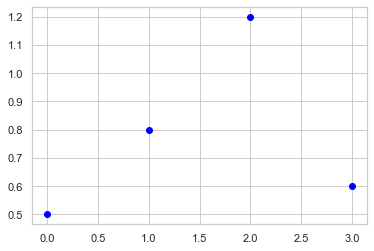

In [207]:
# Sample data
covariate = ['Covariate A', 'Covariate B', 'Covariate C', 'Covariate D']
coef = [0.5, 0.8, 1.2, 0.6]
lower_ci = [0.4, 0.7, 1.1, 0.5]
upper_ci = [0.6, 0.9, 1.3, 0.7]

# Create an array of numbers for the x-axis
x = np.arange(len(covariate))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot coefficients as points
ax.scatter(x, coef, label='Coefficient', color='blue', marker='o')

# Plot confidence intervals as error bars
ax.errorbar(x, coef, yerr=[coef - lower_ci, upper_ci - coef], color='blue', linestyle='none', capsize=5, capthick=1, label='Confidence Interval')

# Set x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(covariate, rotation=45, ha='right')

# Set labels and title
ax.set_ylabel('Coefficient Value')
ax.set_title('Coefficients with Confidence Intervals')

# Show legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()